In [1]:
%matplotlib inline
%config InlineBackend.figure.format = 'retina'

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("poster", font_scale=1.3)
import folium

import pandas as pd
import numpy as np
import json
import ijson
from datetime import datetime, timedelta

The input to this preprocess will be the pickle file generated from P2_EDA_airbnb_paris_01_datamunging.ipynb notebook

In [3]:
#read the cleaned Airbnb Paris pickle file


#dfParis = pd.read_pickle('airbnb_paris/airbnb_Paris_cleansed_0615.p')
dfParis = pd.read_pickle('../data/airbnb_Paris_cleansed_0915.p')

In [4]:
dfParis = dfParis.drop('_merge', axis=1)
dfParis.head()

,accommodates,amenities,availability_30,availability_60,availability_90,bathrooms,bedrooms,beds,cancellation_policy,guests_included,...,review_scores_rating,review_scores_value,reviews_per_month,room_type,summary,transit,zipcode,arrondissement,arrond_name,rating_ind
0,4,"TV,Internet,Wireless Internet,Kitchen,Elevator...",0,0,0,1,1.0,2.0,moderate,1,...,100.0,10.0,0.72,Entire home/apt,The flat is in the heart of Paris at the foot ...,2 metro stations (Alma Marceau line 9 and Ecol...,75007,7,Palais-Bourbon,1
1,4,"TV,Wireless Internet,Kitchen,Heating,Family/ki...",8,13,32,1,1.0,1.0,strict,1,...,80.0,10.0,0.32,Entire home/apt,Grand appartement confortable et traversant de...,NaN,75015,15,Vaugirard,1
2,4,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",9,21,31,1,1.0,1.0,strict,2,...,96.0,10.0,2.79,Entire home/apt,"In front of the Musée d'Orsay, this apartment ...",Metro Assemblée Nationale Ligne 12 Bus Ligne ...,75007,7,Palais-Bourbon,1
3,2,"TV,Internet,Wireless Internet,Kitchen,Indoor f...",0,0,0,1,1.0,1.0,moderate,1,...,NaN,NaN,NaN,Entire home/apt,If you are looking for a real French and Paris...,Three main subway lines (10/12/13) and several...,75007,7,Palais-Bourbon,0
4,4,"TV,Wireless Internet,Kitchen,Elevator in build...",10,22,29,1,1.0,1.0,strict,1,...,97.0,9.0,0.63,Entire home/apt,Appartement 2 pièces tout équipé avec une cham...,Plusieurs lignes de métro et bus desservent l'...,75007,7,Palais-Bourbon,1


In [5]:
dfParis.price.describe()

count    52295.000000
mean        93.718673
std         71.128178
min          0.000000
25%         55.000000
50%         75.000000
75%        105.000000
max        999.000000
Name: price, dtype: float64

the top 10 Paris attractions were from [2018 top 10 attractions in Paris](https://www.tripadvisor.com/Attractions-g187147-Activities-Paris_Ile_de_France.html#ATTRACTION_SORT_WRAPPER) <br> since, we only have ten locations, each of the geo location was searched and populated from google.com 

In [7]:
df_attractions = pd.read_csv('../data/Paris_attractions.csv')
df_attractions.sort_values(by='arrondissement')

,name,latitude,longitude,arrondissement
1,The Louvre,48.8606,2.3376,1
5,Sainte-Chapelle,48.8554,2.3450,1
8,Musee de l'Orangerie,48.8638,2.3227,1
3,Le Marais,48.8587,2.3588,3
7,Notre Dame Cathedral,48.8530,2.3499,4
2,Jardin du Luxembourg,48.8462,2.3372,6
0,Eiffel Tower,48.8584,2.2945,7
4,Musee d'Orsay,48.8600,2.3266,7
9,Pont Alexandre III,48.8639,2.3136,7
6,Palais Garnier - Opera,48.8720,2.3316,9


/Users/ayeshamendoza/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: 'pandas.tools.plotting.table' is deprecated, import 'pandas.plotting.table' instead.
  if sys.path[0] == '':


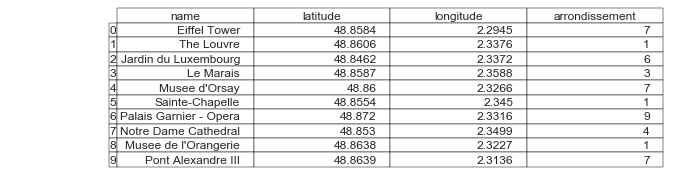

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tools.plotting import table
#from pandas.plotting.table import table
import numpy as np


fig, ax = plt.subplots(figsize=(12, 2)) # set size frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
ax.set_frame_on(False)  # no visible frame, uncomment if size is ok
tabla = table(ax, df_attractions, loc='upper right', colWidths=[0.17]*len(df_attractions.columns))  # where df is your data frame
tabla.auto_set_font_size(False) # Activate set fontsize manually
tabla.set_fontsize(12) # if ++fontsize is necessary ++colWidths
tabla.scale(1.2, 1.2) # change size table
plt.savefig('../images/table.png', transparent=True)

In [10]:
from math import radians, cos, sin, asin, sqrt

def haversine(lat1, lon1, lat2, lon2):
    
    '''Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)'''
    
    lat1 = float(lat1)
    lon1 = float(lon1)
    lat2 = float(lat2)
    lon2 = float(lon2)
    #miles_constant = 3959
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    #haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 3959
    mi = r * c
    return mi

In [11]:
print(haversine(48.89247049179856,2.378547117789503,48.8516,2.3574))

2.98311774765089


In [12]:
df_attractions.reset_index()

,index,name,latitude,longitude,arrondissement
0,0,Eiffel Tower,48.8584,2.2945,7
1,1,The Louvre,48.8606,2.3376,1
2,2,Jardin du Luxembourg,48.8462,2.3372,6
3,3,Le Marais,48.8587,2.3588,3
4,4,Musee d'Orsay,48.8600,2.3266,7
5,5,Sainte-Chapelle,48.8554,2.3450,1
6,6,Palais Garnier - Opera,48.8720,2.3316,9
7,7,Notre Dame Cathedral,48.8530,2.3499,4
8,8,Musee de l'Orangerie,48.8638,2.3227,1
9,9,Pont Alexandre III,48.8639,2.3136,7


Compute the distance between Airbnb property and each of the top 10 attractions, and create a column for each of the attraction, and set the close_to_attraction indicator to 1, if at least one of the distances is within 2 miles.

In [13]:
#Create new features:
#closest_attraction - set to the Attraction name with the shortest distance to the Airbnb property
#attraction_dist - set to the distance of the Attraction closest to the Airbnb property
#site_count - set to the number of attractions within 1 mile of the Airbnb property
#a new column is created for each of the top attraction, which contains the distance between the Airbnb
#property and the attraction/site

#set columns for distance to attraction
for i, bnb in dfParis.iterrows():
    dist_to_attraction = []
    
    site_count = 0
    
    for j, site in df_attractions.iterrows():
        
        locitem = {}
        locitem['name'] = df_attractions.ix[j, 'name']
        #print(site['arrondissement'], site['attraction'])
        locitem['distance'] = haversine(dfParis.ix[i, 'latitude'], 
                                        dfParis.ix[i, 'longitude'],
                                         site['latitude'],site['longitude'])
        dfParis.loc[i, site['name']] = locitem['distance']
        dist_to_attraction.append(locitem)
        
        if locitem['distance'] <= 1.0:
            site_count += 1
    
    dist_sorted = sorted(dist_to_attraction, key = lambda i: (i['distance'], i['name']))    
    dfParis.ix[i,'closest_attraction'] = dist_sorted[0]['name']
    dfParis.ix[i,'attraction_dist'] = dist_sorted[0]['distance']
    
    dfParis.ix[i, 'site_count'] = site_count
    
    if dist_sorted[0]['distance'] < 2.0:
        dfParis.ix[i,'close_to_attraction'] = 1
    else:
        dfParis.ix[i,'close_to_attraction'] = 0
    


/Users/ayeshamendoza/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
/Users/ayeshamendoza/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


In [15]:
dfParis.columns


Index(['accommodates', 'amenities', 'availability_30', 'availability_60',
       'availability_90', 'bathrooms', 'bedrooms', 'beds',
       'cancellation_policy', 'guests_included', 'host_since',
       'host_total_listings_count', 'id', 'last_review', 'latitude',
       'longitude', 'minimum_nights', 'neighbourhood_cleansed',
       'number_of_reviews', 'price', 'property_type', 'review_scores_accuracy',
       'review_scores_checkin', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_rating', 'review_scores_value', 'reviews_per_month',
       'room_type', 'summary', 'transit', 'zipcode', 'arrondissement',
       'arrond_name', 'rating_ind', 'Eiffel Tower', 'The Louvre',
       'Jardin du Luxembourg', 'Le Marais', 'Musee d'Orsay', 'Sainte-Chapelle',
       'Palais Garnier - Opera', 'Notre Dame Cathedral',
       'Musee de l'Orangerie', 'Pont Alexandre III', 'closest_attraction',
       'attraction_dist', 'site_count', 'c

In [16]:
dfParis.groupby(['arrondissement','site_count']).id.count()

arrondissement  site_count
1               0.0              2
                1.0              1
                2.0              1
                3.0              1
                4.0             99
                5.0            299
                6.0            353
                7.0            335
                8.0             10
2               1.0              2
                2.0             42
                3.0            158
                4.0            561
                5.0            562
                6.0            207
                7.0             48
3               1.0            403
                2.0            263
                3.0            728
                4.0            803
                5.0              1
4               1.0              3
                2.0            151
                3.0            712
                4.0            874
                5.0            174
                6.0              7
5               0.0         

In [17]:
dfParis.price.describe()

count    52295.000000
mean        93.718673
std         71.128178
min          0.000000
25%         55.000000
50%         75.000000
75%        105.000000
max        999.000000
Name: price, dtype: float64

In [18]:
#dfParis.to_pickle('airbnb_paris/airbnb_paris_updt_0615.p')
dfParis.to_pickle('../data/airbnb_paris_updt_0915.p')